<a href="https://colab.research.google.com/github/eunsun53/ML_proj/blob/main/recommand_system_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천 알고리즘(Rcommandation Algorithm)
*  종류: content-based filtering/ collaborative filtering 
> * content- based filtering: 사용자가 선택한 아이템을 기반으로 선호할 만한 다른 아이템 추천 
> * collaborative filtering: 사용자의 행동 패턴을 기반으로 분석해 추천하는 방식  

# collaborative filtering : 협업 기반 필터링 
>  * (A) 사용자 기반 협업 필터링 (user-base collaborative filtering)
>  * (B) 아이템 기반 협업 필터링 (item-based collaborative filtering)  

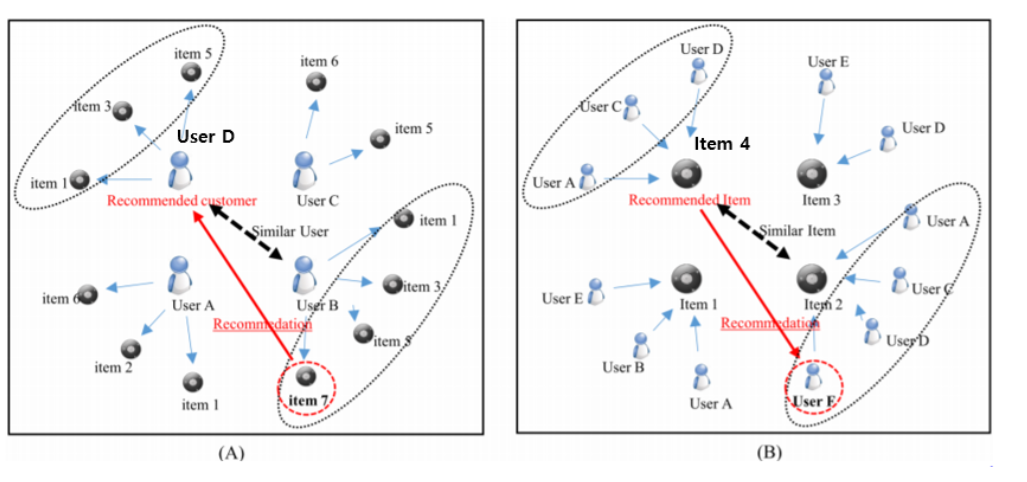

In [1]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/dataset/movie_lens

In [ ]:
!unzip movie_lens.zip

In [ ]:
!ls

movie_lens.zip	sample_data


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 영화 평가 데이터와 영화 정보 데이터가 따로 된 데이터셋이라서 각가 따로 불러온 뒤, merge 시켜주도록 함 
rating_data = pd.read_csv('./ratings.csv')
movie_data = pd.read_csv('./movies.csv')

In [ ]:
rating_data.head(3)

In [ ]:
movie_data.head(3)

In [ ]:
# 'timestamp' 열 지우기(axis =1)
rating_data.drop('timestamp', axis = 1, inplace = True)
rating_data.head(3)

In [ ]:
# 평가 데이터, 영화 정보 데이터가  movieId로 서로 합칠 수 있음 
user_movie_rating = pd.merge(rating_data, movie_data, on = 'movieId') 
user_movie_rating.head(3)

In [ ]:
# pivot table 만들기 (내가 원하는 정보를 나타낸 표)
movie_user_rating = user_movie_rating.pivot_table('rating', index = 'title', columns = 'userId') # 영화-사용자 평가표 -> item-based filtering
user_movie_rating = user_movie_rating.pivot_table('rating', index = 'userId', columns = 'title') # 사용자-영화 평가표 -> user-based filtering 

In [ ]:
movie_user_rating.head(5)

In [ ]:
user_movie_rating.head(5)

In [ ]:
# item-based filtering
# NaN 값을 0으로 바꾸기 
movie_user_rating.fillna(0, inplace = True)
movie_user_rating.head(5)

In [ ]:
# 코사인 유사도 구하기: item간의 유사도 측정
item_based_collabor = cosine_similarity(movie_user_rating)
item_based_collabor

In [ ]:
print(movie_user_rating.shape)
print(item_based_collabor.shape)

In [ ]:
# DataFrame 형태로 변환
item_based_collabor = pd.DataFrame(data = item_based_cpllabor, index = movie_user_rating,index, columns = movie_user_rating.index)
item_base_collabor.head()

In [ ]:
# 아이템 기반 추천 함수 
def get_item_based_collabor(title):
  return item_based_collabor[title].sort_values(ascending = False)[:6] #내림차순으로 정렬한 뒤 유사도 큰 순으로 6개 item 리턴

In [ ]:
get_item_based_collabor('Godfather, The (1972)')

[참고링크](https://github.com/lsjsj92/recommender_system_with_Python/blob/master/003.%20recommender%20system%20basic%20with%20Python%20-%202%20Collaborative%20Filtering.ipynb)